In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the dataset
house_df = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
house_df.shape

(1460, 81)

In [5]:
# head
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# all numeric (float and int) variables in the dataset
house_df_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [8]:
# correlation matrix
cor = house_df_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

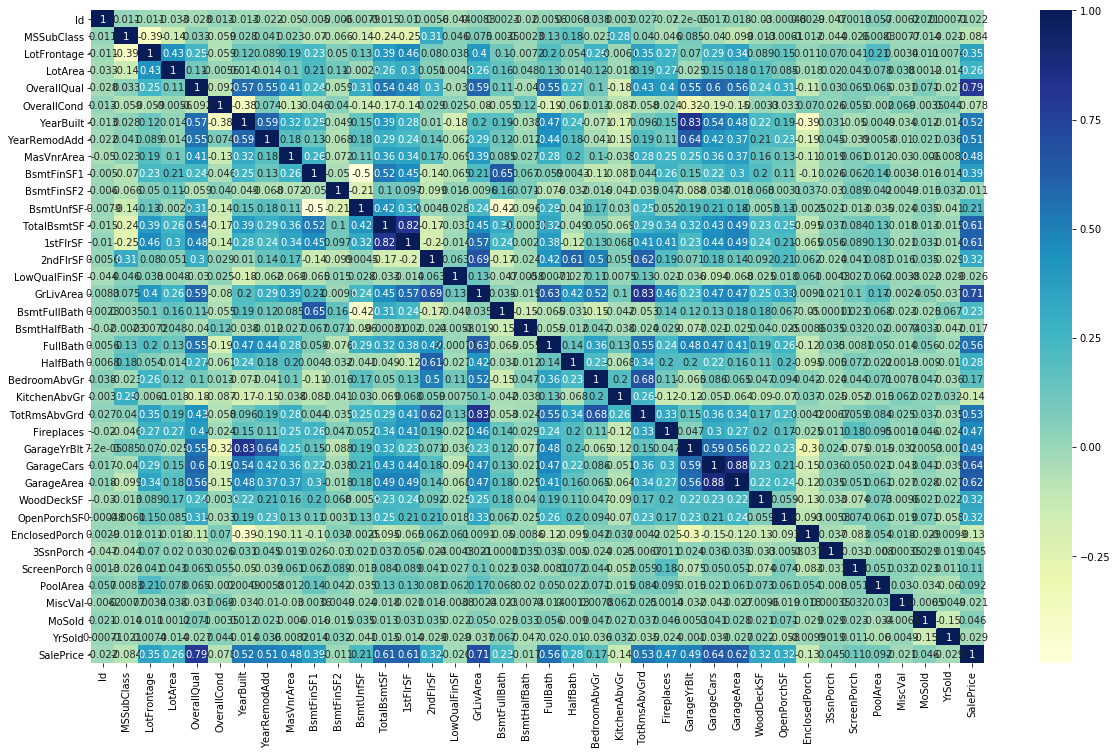

In [9]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [10]:
col=house_df.columns

for i in col:
    if house_df[i].nunique()<10:
        print(i, end=':')
        print(house_df[i].value_counts())

MSZoning:RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street:Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley:Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape:Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour:Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities:AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig:Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope:Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Condition1:Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Condition2:Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dt

In [11]:
#checking for missing values
missing= round(100*(house_df.isnull().sum()/len(house_df.index)), 2)
missing_df=pd.DataFrame(missing)
missing_df=missing_df.T
missing_col=missing_df.columns
missing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.0,0.0,17.74,0.0,0.0,93.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.55,0.0,0.0,0.0,2.53,2.53,2.6,2.53,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.26,5.55,5.55,5.55,0.0,0.0,5.55,5.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.52,80.75,96.3,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# dropping columns th at have high number of missing values
for i in missing_col:
    if (missing_df[i].sum()>15):
        house_df=house_df.drop(i,axis=1)


In [13]:
house_df.shape

(1460, 75)

In [14]:
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

In [15]:
house_df.shape

(1460, 75)

In [16]:
#checking for skewnss
house_df.skew(axis = 0, skipna = True) 

Id                0.000000
MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [17]:
#checking for missing values
skewed= house_df.skew(axis = 0, skipna = True) 
skewed_df=pd.DataFrame(skewed)
skewed_df=skewed_df.T
skewed_col=skewed_df.columns
skewed_df.head()


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.0,1.407657,12.207688,0.216944,0.693067,-0.613461,-0.503562,2.669084,1.685503,4.255261,0.920268,1.524255,1.376757,0.81303,9.011341,1.36656,0.596067,4.103403,0.036562,0.675897,0.21179,4.488397,0.676341,0.649565,-0.649415,-0.342549,0.179981,1.541376,2.364342,3.089872,10.304342,4.122214,14.828374,24.476794,0.212053,0.096269,1.882876


In [18]:
# dropping columns th at have high skewness
for i in skewed_col:
    if (skewed_df[i].sum()>3):
        house_df=house_df.drop(i,axis=1)

In [19]:
house_df.shape

(1460, 65)

In [20]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non

In [21]:
#['MasVnrArea', 'BsmtQual' , 'BsmtCond' ,'BsmtExposure', 'BsmtFinType1' ,'BsmtFinType2', 'Electrical',
 #       'GarageType'    , 'GarageFinish','GarageQual', 'GarageCond']              

In [22]:
# Imputing the missing values for "continuous variables"
print(house_df['MasVnrArea'].mean())
print(house_df['MasVnrArea'].median())
house_df['MasVnrArea']= house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean())

103.68526170798899
0.0


In [23]:
print(house_df['GarageYrBlt'].mean())
print(house_df['GarageYrBlt'].median())
house_df['GarageYrBlt']= house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].median())

1978.5061638868744
1980.0


In [24]:
# Missing values treatment for "Categorical Variables"
col_1=[ 'MasVnrType','BsmtQual' , 'BsmtCond' ,'BsmtExposure', 'BsmtFinType1' ,'BsmtFinType2', 'Electrical',
       'GarageType'    , 'GarageFinish','GarageQual', 'GarageCond']     

In [25]:
for i in col_1:
    house_df[i]=house_df[i].value_counts().argmax()

In [26]:
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd 

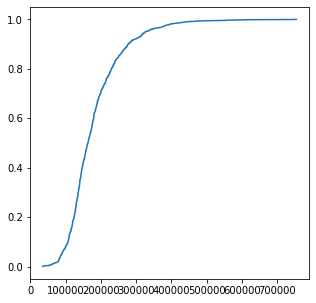

In [27]:
# Cheking the target variable is Normally distributed are not.....
def df_plot(df):

    n = len(df)
    x = np.sort(df)
    y = np.arange(1, n+1) / n
    return x, y
x,y = df_plot(house_df["SalePrice"])
plt.figure(figsize=(5,5))
plt.plot(x, y)

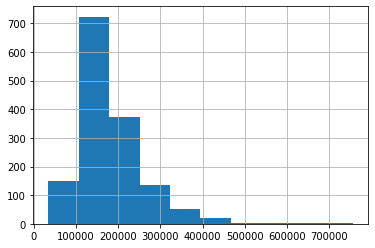

In [28]:
house_df["SalePrice"].hist()

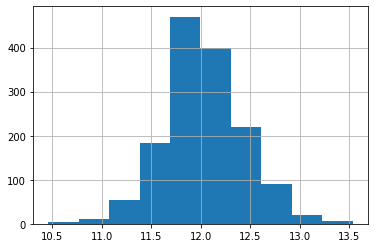

In [29]:
house_df['SalePrice']=np.log(house_df['SalePrice'])
house_df['SalePrice'].hist()

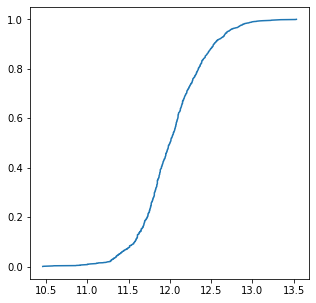

In [30]:
# Cheking the target variable is Normally distributed are not.....
def df_plot(df):

    n = len(df)
    x = np.sort(df)
    y = np.arange(1, n+1) / n
    return x, y
x,y = df_plot(house_df["SalePrice"])
plt.figure(figsize=(5,5))
plt.plot(x, y)

In [31]:
find_year_col= house_df.columns

In [32]:
find_year_col

Index(['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [33]:
#YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
house_df['YearBuilt_age']=house_df['YearBuilt'].max()-house_df['YearBuilt']



In [34]:
house_df['YearRemodAdd_age']=house_df['YearRemodAdd'].max()-house_df['YearRemodAdd']
house_df['GarageYrBlt_age']=house_df['GarageYrBlt'].max()-house_df['GarageYrBlt']
house_df['YrSold_age']=house_df['YrSold'].max()-house_df['YrSold']


In [35]:
#dropping the actual columns
actual_col=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

for i in actual_col:
    house_df=house_df.drop(i,axis=1)

In [36]:
house_df.shape

(1460, 65)

In [37]:
cat_col = [key for key in dict(house_df.dtypes) if dict(house_df.dtypes)[key] in ['object'] ] 


In [38]:
print(cat_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [39]:
status=pd.get_dummies(house_df[cat_col],drop_first=True)
status.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=155)

In [40]:
# Concatinating original with status
house_df=pd.concat([house_df,status],axis=1)
col_final= house_df.columns


In [41]:
# Dropping original columns after creating dummies
house_df=house_df.drop(cat_col,axis=1)

In [42]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 182 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(24), uint8(155)
memory usage: 529.0 KB


In [43]:
house_df.shape

(1460, 182)

In [44]:
# Putting feature variable to X
X = house_df.drop(['Id','SalePrice'], axis=1)
X.head()

,MSSubClass,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2,7,7,7.0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,5,34,34,34.0,3,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,9,9,8,9.0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,

In [45]:
# Putting response variable to y
y = house_df['SalePrice']
#y = np.exp(y)
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [46]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [47]:
house_df.head()

,Id,MSSubClass,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2,12.247694,7,7,7.0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,5,12.109011,34,34,34.0,3,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,9,12.317167,9,8,9.0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [48]:
# split into train and test
import sklearn
from sklearn.model_selection import train_test_split

In [49]:
house_df.head()

,Id,MSSubClass,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2,12.247694,7,7,7.0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,5,12.109011,34,34,34.0,3,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,9,12.317167,9,8,9.0,2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [50]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
X_train.head()

,MSSubClass,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.636078,-0.795151,0.381743,-0.574410,0.053428,-0.387671,-0.441061,-0.772733,-0.795163,-1.240174,1.107810,-1.026041,-0.761621,-1.062465,-0.934130,-0.951226,-2.365440,-2.212963,-0.752176,-0.704483,-0.85911,1.532424,1.689368,-0.058817,-0.138777,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159000,0.337126,-0.02618,-0.262324,-0.18238,-0.052414,0.622762,-0.215859,-0.094785,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,3.687818,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.242360,0.39841,-0.074227,-0.114827,-0.087129,-0.134652,-0.037037,-0.058621,-0.064238,0.101885,-0.02618,-0.037037,-0.02618,-0.02618,-0.037037,-0.147287,-0.192177,-0.1742,-0.291025,-0.098397,1.005495,-0.074227,-0.087129,-0.662136,-0.16125,-0.215859,0.528753,-0.087129,-0.493570,-0.069409,-0.037037,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,-0.423464,-0.0

In [52]:
X_test.head()

,MSSubClass,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.872563,-1.518467,0.381743,-0.574410,0.378031,-0.722728,-0.441061,-0.772733,-0.795163,-1.240174,-0.819964,-1.026041,-0.761621,0.163779,-0.934130,-0.951226,0.311725,0.257425,-0.752176,-0.704483,-0.489110,0.008870,0.671845,0.191299,0.614439,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,0.337126,-0.02618,-0.262324,5.483049,-0.052414,-1.605749,-0.215859,-0.094785,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,2.342838,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.24236,0.39841,-0.074227,-0.114827,-0.087129,-0.134652,-0.037037,-0.058621,-0.064238,0.101885,-0.02618,-0.037037,-0.02618,-0.02618,-0.037037,-0.147287,-0.192177,-0.1742,-0.291025,-0.098397,1.005495,-0.074227,-0.087129,-0.662136,-0.16125,-0.215859,0.528753,-0.087129,-0.49357,-0.069409,-0.037037,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,2.361478,-0.02618,-0

In [53]:
y_train.head()

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
Name: SalePrice, dtype: float64

In [54]:
y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

# ridge regression

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# List of alpha to tune
params = {'alpha' : [0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,
                     0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,100,500,1000,2000]}
ridge=Ridge()

# Cross validation
folds=5
model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 100, 500, 1000,
                                   2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004604,0.002789,0.000799,0.000747,0.001,{'alpha': 0.001},-0.085079,-0.096707,-0.094487,-0.095371,-0.080461,-0.090416,0.006453,22,-0.061676,-0.061655,-0.061534,-0.062189,-0.061501,-0.061711,0.000248
1,0.006250,0.007655,0.000000,0.000000,0.01,{'alpha': 0.01},-0.085056,-0.096701,-0.094490,-0.095348,-0.080460,-0.090406,0.006453,21,-0.061678,-0.061656,-0.061533,-0.062192,-0.061503,-0.061712,0.000249
2,0.009375,0.007655,0.000000,0.000000,0.05,{'alpha': 0.05},-0.084959,-0.096672,-0.094507,-0.095248,-0.080454,-0.090363,0.006452,20,-0.061688,-0.061661,-0.061526,-0.062202,-0.061510,-0.061718,0.000252
3,0.009375,0.007654,0.001457,0.002914,0.1,{'alpha': 0.1},-0.084861,-0.096637,-0.094527,-0.095124,-0.080449,-0.090314,0.006448,19,-0.061699,-0.061667,-0.061519,-0.062216,-0.061521,-0.061725,0.000257
4,0.008398,0.001199,0.001798,0.000749,0.2,{'alpha': 0.2},-0.084706,-0.096571,-0.094567,-0.094878,-0.080438,-0.090227,0.006434,18,-0.061723,-0.061679,-0.061509,-0.062244,-0.061547,-0.061740,0.000264


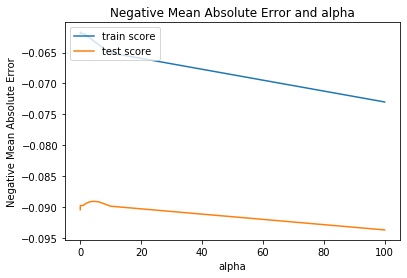

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [59]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.33621964e-02,  6.68930397e-02,  3.92100893e-02,  5.52709011e-03,
        1.81505643e-02, -1.06220504e-02,  4.40410393e-02,  5.95446720e-02,
        4.63487659e-02,  6.84177424e-02,  2.28307619e-02,  1.00470902e-02,
        3.96387454e-03,  2.44485294e-03,  3.94462216e-03,  1.62611955e-02,
        1.84199194e-02,  1.92499794e-02,  1.01526417e-02,  7.18542911e-03,
       -3.63674242e-03, -5.58070734e-02, -2.09640664e-02, -2.45890410e-03,
        4.26269431e-03,  6.39779427e-02,  3.40598293e-02,  1.35480772e-01,
        1.04390626e-01,  1.05325251e-03,  3.20041342e-03,  1.24189311e-03,
        2.03905253e-04,  4.54380060e-03,  7.77761723e-03,  8.39363088e-03,
       -3.43417383e-03,  9.42971659e-03, -3.62391123e-03, -1.92185596e-03,
       -9.36583085e-04,  5.58532607e-03,  1.08721433e-03,  1.42363786e-03,
       -8.29222151e-03,  6.55378641e-03,  1.02091385e-02, -2.46865144e-03,
        2.70375747e-02, -1.27155414e-02, -1.35844170e-03, -2.93192281e-03,
       -1.89036972e-02, -

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_)))
print(r2_score(y_train, pred_train_))

pred_test_= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_))) 
print(r2_score(y_test, pred_test_))



0.08936672762498431
0.9491930167981504
0.14437329183490258
0.8733217902413624


ridge_coeff = pd.Series(ridge.coef_, index = X_train.columns)
ridge_coeff

In [61]:
ridge_coeff_1= pd.DataFrame(sorted(list(zip(abs(ridge.coef_),X_train.columns))))

In [62]:
top_5_ridge_coeff= ridge_coeff_1.tail(5)
top_5_ridge_coeff

,0,1
175,0.119427,RoofMatl_WdShake
176,0.135481,MSZoning_RL
177,0.148757,RoofMatl_WdShngl
178,0.194598,RoofMatl_Tar&Grv
179,0.289796,RoofMatl_CompShg


imp_ridge_coef = pd.concat([ridge_coeff.sort_values().head(10),ridge_coeff.sort_values().tail(10)])
imp_ridge_coef

In [63]:
#for subjective question 1
alpha = 8
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(X_train, y_train)
ridge_2.coef_

array([-2.13192840e-02,  6.98473165e-02,  3.86518277e-02,  5.47921213e-03,
        1.54337026e-02, -9.91678263e-03,  3.82310435e-02,  5.49953605e-02,
        4.21656464e-02,  6.85034364e-02,  2.50228060e-02,  1.27166114e-02,
        5.76439588e-03,  3.49345793e-03,  5.36940339e-03,  1.68018649e-02,
        2.28530909e-02,  1.51281448e-02,  1.05358675e-02,  6.59687673e-03,
       -3.70096401e-03, -5.00028313e-02, -2.09540159e-02, -2.03733101e-03,
        4.56590818e-03,  5.02318624e-02,  2.74550254e-02,  1.08655232e-01,
        8.30857902e-02,  1.51282227e-03,  3.50085083e-03, -1.01557574e-03,
       -1.20035277e-04,  5.47376123e-03,  8.28072970e-03,  9.51263039e-03,
       -3.40579954e-03,  9.94574973e-03, -3.88047497e-03, -2.39312821e-03,
       -6.48594896e-04,  5.74870778e-03,  1.83452496e-03,  1.05790652e-03,
       -8.89452794e-03,  4.05297516e-03,  1.03939920e-02, -2.75846562e-03,
        2.61404654e-02, -1.47629063e-02, -2.15134868e-03, -6.83437748e-03,
       -1.98109244e-02, -

ridge_coeff_30 = pd.Series(ridge_30.coef_, index = X_train.columns)
imp_ridge_coef_30 = pd.concat([ridge_coeff_30.sort_values().head(10),ridge_coeff_30.sort_values().tail(10)])
imp_ridge_coef_30

In [64]:
ridge_coeff_2= pd.DataFrame(sorted(list(zip(abs(ridge_2.coef_),X_train.columns))))

In [65]:
top_5_ridge_coeff_2= ridge_coeff_2.tail(5)
top_5_ridge_coeff_2

,0,1
175,0.095136,RoofMatl_WdShake
176,0.108655,MSZoning_RL
177,0.123118,RoofMatl_WdShngl
178,0.158854,RoofMatl_Tar&Grv
179,0.236041,RoofMatl_CompShg


In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_= ridge_2.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_)))
print(r2_score(y_train, pred_train_))

pred_test_= ridge_2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_))) 
print(r2_score(y_test, pred_test_))

0.09163745306659955
0.9465782983613981
0.14253046309478115
0.8765350764380034


# Lasso regression

In [67]:
lasso = Lasso()
params = {'alpha' : [0.001, 0.003, 0.005, 0.007, 0.009,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.003, 0.005, 0.007, 0.009, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.151541,0.011733,0.000000,0.000000,0.001,{'alpha': 0.001},-0.079959,-0.094245,-0.096975,-0.090033,-0.078296,-0.087894,0.007517,1,-0.066555,-0.064871,-0.064866,-0.066350,-0.066563,-0.065841,0.000798
1,0.037497,0.007662,0.000000,0.000000,0.003,{'alpha': 0.003},-0.086771,-0.097627,-0.101013,-0.088225,-0.081176,-0.090958,0.007295,2,-0.076521,-0.069844,-0.074608,-0.075157,-0.076581,-0.074542,0.002471
2,0.011462,0.006361,0.003525,0.006100,0.005,{'alpha': 0.005},-0.089759,-0.098841,-0.102581,-0.087092,-0.087406,-0.093133,0.006362,3,-0.082780,-0.072671,-0.080637,-0.082271,-0.083376,-0.080347,0.003945
3,0.012499,0.006249,0.003125,0.006249,0.007,{'alpha': 0.007},-0.089578,-0.099473,-0.103373,-0.086907,-0.091758,-0.094213,0.006203,4,-0.085763,-0.075808,-0.084257,-0.085569,-0.086260,-0.083531,0.003918
4,0.009375,0.007655,0.000000,0.000000,0.009,{'alpha': 0.009},-0.089419,-0.100547,-0.104801,-0.087750,-0.095323,-0.095562,0.006466,5,-0.088349,-0.078729,-0.087103,-0.088675,-0.088561,-0.086283,0.003819


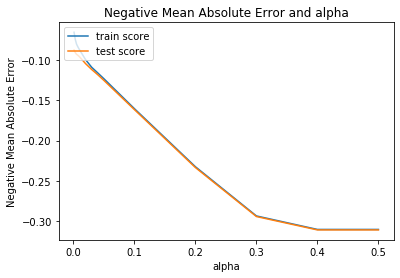

In [69]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [70]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [71]:
alpha =0.001

lasso_1 = Lasso(alpha=alpha)
        
lasso_1.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
lasso_1.coef_

array([-1.82168905e-02,  7.53825073e-02,  4.20794287e-02,  5.13968703e-03,
        2.13300642e-02, -3.62346215e-03,  3.74619819e-02,  1.35430600e-02,
        0.00000000e+00,  1.29210919e-01,  2.54275614e-02,  8.24875663e-03,
        4.09981921e-03,  0.00000000e+00,  2.78600742e-03,  1.71112486e-02,
        2.27496265e-02,  1.56619043e-02,  1.08643649e-02,  6.31276212e-03,
       -2.69144589e-03, -5.92287776e-02, -2.24293174e-02, -0.00000000e+00,
        2.78694074e-03,  3.47267783e-02,  1.92794316e-02,  7.99480581e-02,
        5.13238227e-02,  0.00000000e+00,  2.19292925e-03, -0.00000000e+00,
       -0.00000000e+00,  1.86557484e-03,  4.93939420e-03,  1.71934172e-03,
       -2.24938401e-03,  9.27049816e-03, -1.64252563e-03, -2.74431142e-04,
        0.00000000e+00,  2.13697843e-03,  7.08161212e-04,  7.08043276e-05,
       -5.52008947e-03,  6.43940137e-03,  1.21317689e-02, -0.00000000e+00,
        2.59200287e-02, -9.93445979e-03, -0.00000000e+00, -4.53194895e-03,
       -1.45446166e-02, -

In [73]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_= lasso_1.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_)))
print(r2_score(y_train, pred_train_))

pred_test_= lasso_1.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_))) 
print(r2_score(y_test, pred_test_))


0.09330654215630445
0.9446145246100018
0.14242159940609841
0.8767236075590223


In [74]:
print("Lasso picked " + str(sum(lasso_1.coef_ != 0)) + " variables and eliminated the other " +  str(sum(lasso_1.coef_ == 0)) + " variables")

Lasso picked 135 variables and eliminated the other 45 variables


In [75]:
lasso_coeff_1= pd.DataFrame(sorted(list(zip(abs(lasso_1.coef_),X_train.columns))))

In [95]:
top_5_lasso_coeff_1= lasso_coeff_1.tail(5)
top_5_lasso_coeff_1

,0,1
175,0.110618,RoofMatl_WdShake
176,0.129211,GrLivArea
177,0.135951,RoofMatl_WdShngl
178,0.180746,RoofMatl_Tar&Grv
179,0.264151,RoofMatl_CompShg


In [77]:
# for subjective question 1
alpha =0.001 *2

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
lasso_2.coef_

array([-1.65677042e-02,  8.60516111e-02,  4.12005821e-02,  4.63438822e-03,
        1.71679787e-02, -0.00000000e+00,  2.60614381e-02,  8.32151015e-03,
        0.00000000e+00,  1.26635141e-01,  3.06399552e-02,  9.92374820e-03,
        4.85269140e-03,  0.00000000e+00,  4.12795649e-03,  1.82818847e-02,
        3.25743013e-02,  7.01114871e-03,  1.11171214e-02,  3.60070284e-03,
       -1.28473551e-03, -5.25042768e-02, -2.15323923e-02, -0.00000000e+00,
        2.51091025e-03,  2.78935753e-03,  3.92233289e-03,  2.13554175e-02,
        0.00000000e+00,  0.00000000e+00,  2.25220385e-03, -3.06838261e-03,
       -0.00000000e+00,  1.07973201e-03,  4.50858021e-03,  0.00000000e+00,
       -1.32648647e-03,  9.44415982e-03, -8.68066951e-04, -0.00000000e+00,
        0.00000000e+00,  1.81752385e-04,  1.78174918e-03,  0.00000000e+00,
       -4.28688908e-03,  3.30920497e-03,  1.32247951e-02,  0.00000000e+00,
        2.46387258e-02, -1.06988492e-02, -0.00000000e+00, -9.22165855e-03,
       -1.09742031e-02, -

In [79]:
 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_= lasso_2.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_)))
print(r2_score(y_train, pred_train_))

pred_test_= lasso_2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_))) 
print(r2_score(y_test, pred_test_))

0.10248604727526545
0.9331808134768848
0.14232669000624396
0.8768878549767827


In [80]:
lasso_coeff_2= pd.DataFrame(sorted(list(zip(abs(lasso_2.coef_),X_train.columns))))

In [81]:
top_5_lasso_coeff_2= lasso_coeff_2.tail(5)
top_5_lasso_coeff_2

,0,1
175,0.086052,OverallQual
176,0.086840,RoofMatl_WdShngl
177,0.111878,RoofMatl_Tar&Grv
178,0.126635,GrLivArea
179,0.162751,RoofMatl_CompShg


In [82]:
print("Lasso picked " + str(sum(lasso_2.coef_ != 0)) + " variables and eliminated the other " +  str(sum(lasso_2.coef_ == 0)) + " variables")

Lasso picked 123 variables and eliminated the other 57 variables


####  Question 3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer: 


In [108]:
X_train.shape

(1021, 180)

In [109]:
X_test.shape

(438, 180)

In [85]:
y_train.head()

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
Name: SalePrice, dtype: float64

In [86]:
y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

In [103]:
# top 5 variables form ridge
top_five_pred_var_1= list(top_5_ridge_coeff[1])
print(top_five_pred_var_1)

['RoofMatl_WdShake', 'MSZoning_RL', 'RoofMatl_WdShngl', 'RoofMatl_Tar&Grv', 'RoofMatl_CompShg']


In [129]:
top_five_pred_var_2= list(top_5_ridge_coeff_2[1])
print(top_five_pred_var_2)

['RoofMatl_WdShake', 'MSZoning_RL', 'RoofMatl_WdShngl', 'RoofMatl_Tar&Grv', 'RoofMatl_CompShg']


In [104]:
# top 5 variables form lasso
top_five_pred_var_3= list(top_5_lasso_coeff_1[1])
print(top_five_pred_var_3)

['RoofMatl_WdShake', 'GrLivArea', 'RoofMatl_WdShngl', 'RoofMatl_Tar&Grv', 'RoofMatl_CompShg']


In [130]:
top_five_pred_var_4= list(top_5_lasso_coeff_2[1])
print(top_five_pred_var_4)

['OverallQual', 'RoofMatl_WdShngl', 'RoofMatl_Tar&Grv', 'GrLivArea', 'RoofMatl_CompShg']


## looking at all the outputs above, the top 5 variables from lasso.

##### dropping these 5 variables from top_five_pred_var_3 and running lasso again 

In [111]:
new_X_train= X_train.drop(top_five_pred_var_2, axis=1)
new_X_test= X_test.drop(top_five_pred_var_2, axis=1)

In [112]:
new_X_train.shape

(1021, 175)

In [114]:
new_X_test.shape

(438, 175)

In [115]:
lasso = Lasso()
params = {'alpha' : [0.001, 0.003, 0.005, 0.007, 0.009,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(new_X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.003, 0.005, 0.007, 0.009, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [116]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.147906,0.021180,0.001799,0.000400,0.001,{'alpha': 0.001},-0.091362,-0.094788,-0.106369,-0.089440,-0.088115,-0.094012,0.006570,2,-0.076680,-0.064915,-0.075027,-0.076728,-0.076604,-0.073991,0.004582
1,0.034183,0.007327,0.001600,0.000482,0.003,{'alpha': 0.003},-0.091237,-0.098012,-0.103581,-0.088481,-0.086785,-0.093617,0.006280,1,-0.081057,-0.070075,-0.078580,-0.080230,-0.080872,-0.078163,0.004137
2,0.015791,0.004352,0.001799,0.000400,0.005,{'alpha': 0.005},-0.090730,-0.099880,-0.103506,-0.086701,-0.089313,-0.094023,0.006492,3,-0.084170,-0.073035,-0.081926,-0.083371,-0.084150,-0.081331,0.004227
3,0.011992,0.002527,0.001399,0.000490,0.007,{'alpha': 0.007},-0.090692,-0.101546,-0.104726,-0.086494,-0.094520,-0.095591,0.006733,4,-0.087358,-0.076348,-0.085600,-0.086815,-0.087488,-0.084722,0.004240
4,0.009593,0.000490,0.001599,0.000800,0.009,{'alpha': 0.009},-0.091071,-0.103514,-0.106534,-0.087293,-0.098613,-0.097399,0.007272,5,-0.090322,-0.079741,-0.088835,-0.090417,-0.090335,-0.087930,0.004137


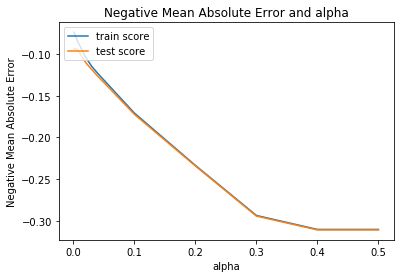

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
print(model_cv.best_params_)

{'alpha': 0.003}


In [119]:
alpha =0.003

lasso_3 = Lasso(alpha=alpha)
        
lasso_3.fit(new_X_train, y_train)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
lasso_3.coef_

array([-1.99802489e-02,  9.74657097e-02,  3.56430565e-02,  3.93033945e-03,
        7.33450333e-03, -0.00000000e+00,  1.39298642e-02,  8.69369559e-02,
        8.10047324e-02,  3.59872380e-02,  1.87381759e-02,  9.83734846e-03,
        3.14660357e-04,  1.39353172e-02,  1.93246870e-02,  4.22073542e-02,
        0.00000000e+00,  1.30216553e-02,  4.89676264e-04, -0.00000000e+00,
       -3.84232830e-02, -2.31014004e-02, -0.00000000e+00,  3.72924559e-03,
        0.00000000e+00,  2.20799958e-03,  1.86520207e-02, -0.00000000e+00,
        0.00000000e+00,  2.51363877e-03, -9.68900273e-03, -0.00000000e+00,
        1.21111283e-03,  6.75980591e-03,  0.00000000e+00, -1.19327453e-03,
        9.69146929e-03, -8.92450132e-04, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.90219829e-03,
        0.00000000e+00,  1.47419531e-02,  0.00000000e+00,  2.45021750e-02,
       -1.39136819e-02, -0.00000000e+00, -1.15989140e-02, -9.03312424e-03,
       -1.78300981e-04,  

In [123]:
 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_= lasso_3.predict(new_X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_)))
print(r2_score(y_train, pred_train_))

pred_test_= lasso_3.predict(new_X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_))) 
print(r2_score(y_test, pred_test_))

0.11778075609706042
0.9117488500346573
0.14442071986840657
0.8732385465172673


In [124]:
lasso_coeff_3= pd.DataFrame(sorted(list(zip(abs(lasso_3.coef_),X_train.columns))))

In [127]:
top_5_lasso_coeff_3= lasso_coeff_3.tail(5)
top_5_lasso_coeff_3

,0,1
170,0.040861,Condition2_PosA
171,0.042207,Fireplaces
172,0.081005,2ndFlrSF
173,0.086937,1stFlrSF
174,0.097466,OverallQual


In [128]:
print(list(top_5_lasso_coeff_3[1]))

['Condition2_PosA', 'Fireplaces', '2ndFlrSF', '1stFlrSF', 'OverallQual']
